In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from google.colab import files
uploaded = files.upload()

Saving flood.csv to flood.csv


In [3]:
import pandas as pd

df = pd.read_csv("flood.csv")

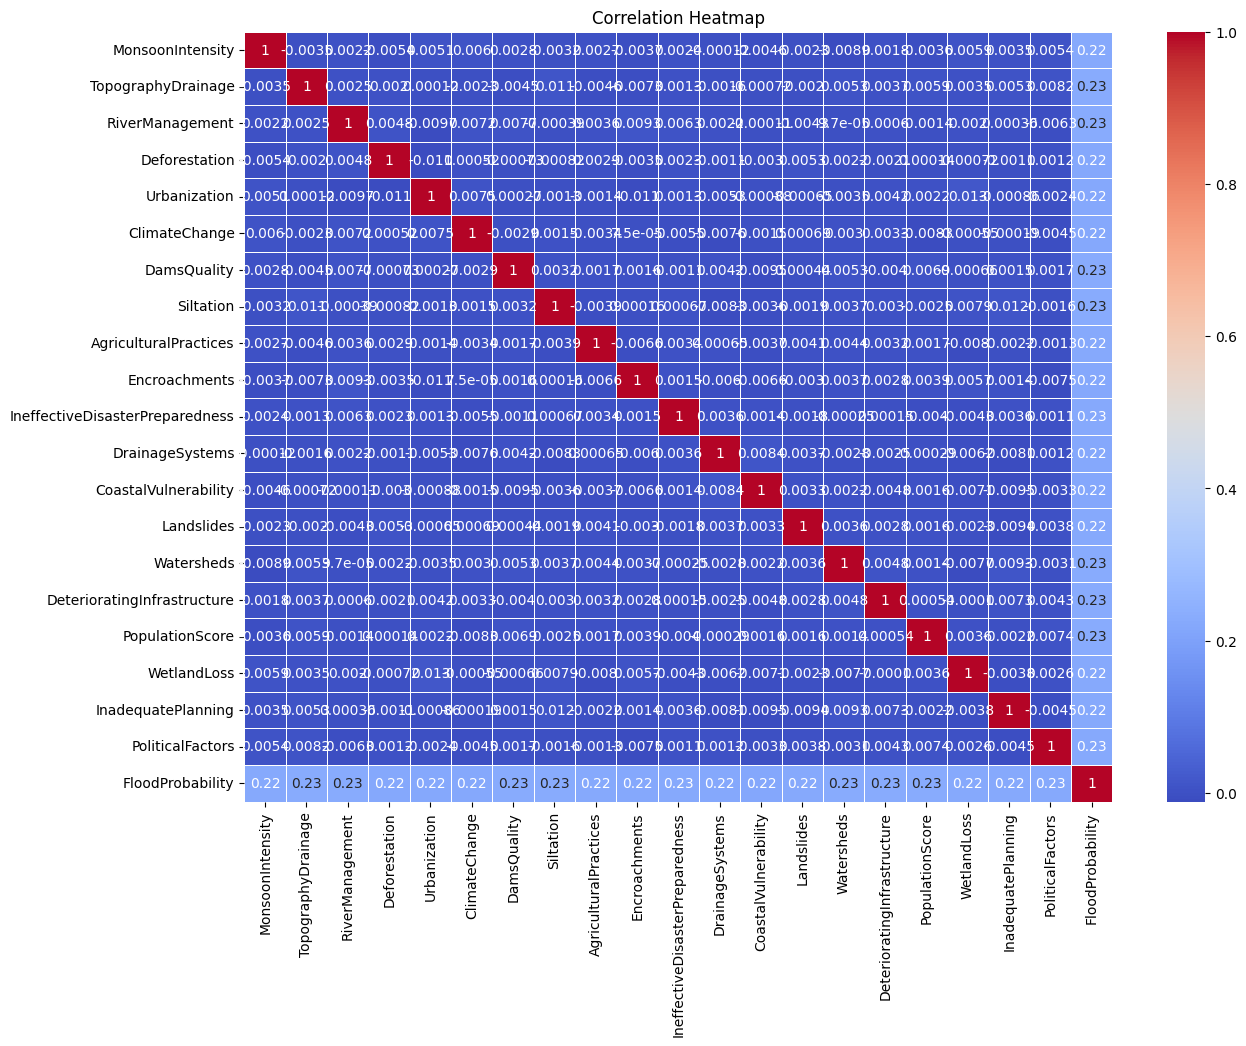

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

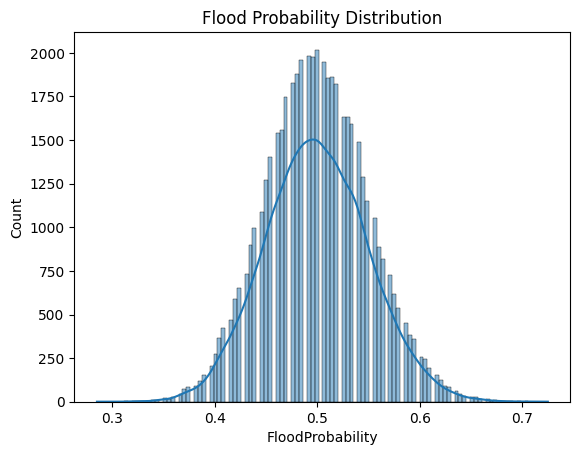

In [5]:
# Target Distribution
sns.histplot(df['FloodProbability'], kde=True)
plt.title("Flood Probability Distribution")
plt.show()

Number of features: 20


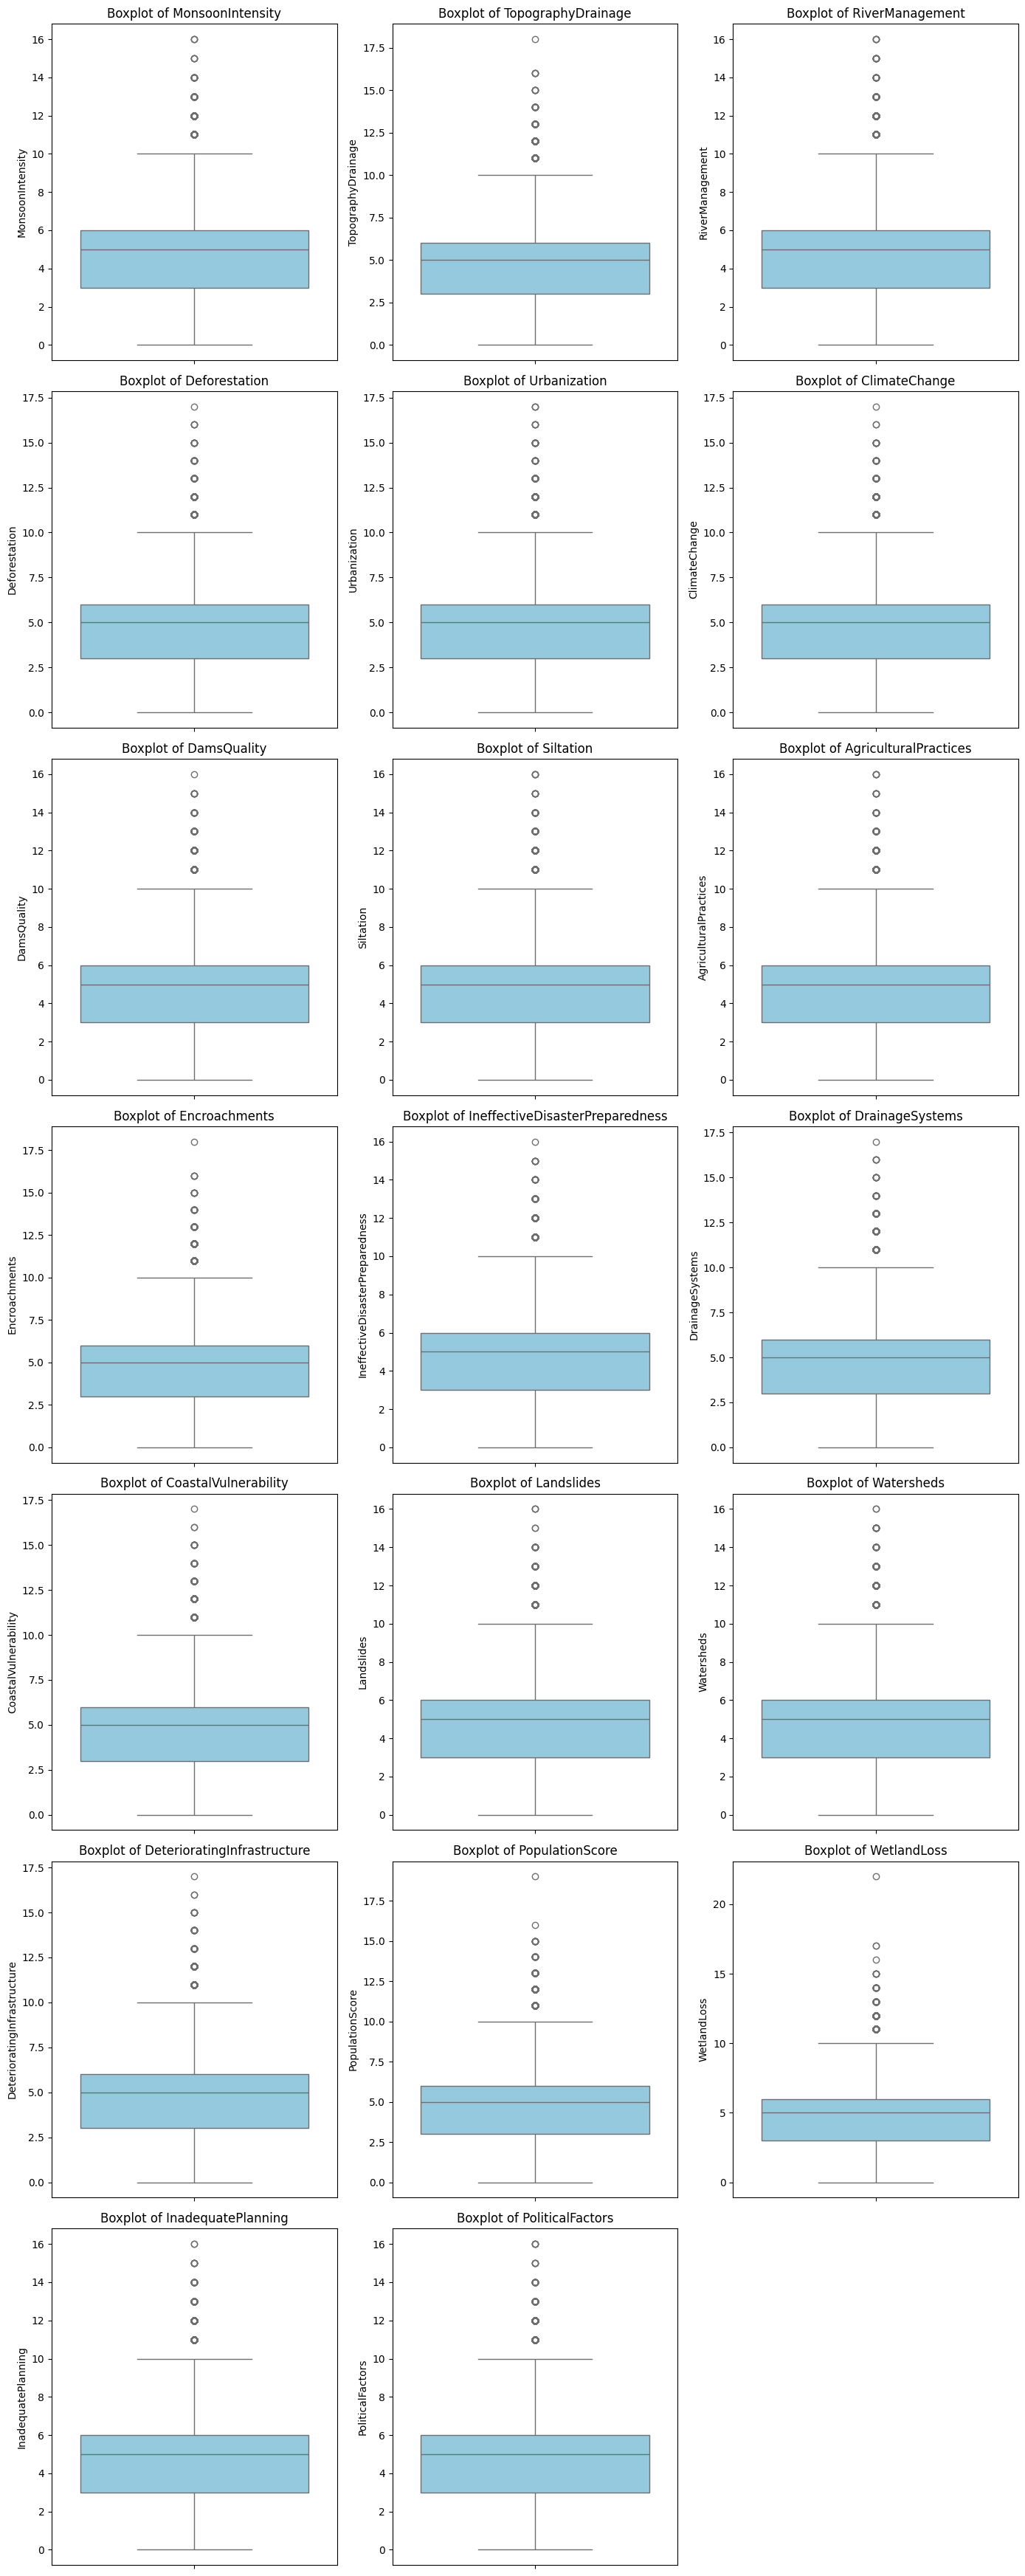

In [7]:
import math

subset_features = df.columns[:-1]  # Exclude target column
num_features = len(subset_features)
print(f"Number of features: {num_features}")

# Dynamically calculate rows and columns
cols = 3
rows = math.ceil(num_features / cols)

plt.figure(figsize=(14, 5 * rows))
for i, feature in enumerate(subset_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()




In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
rf_train_time = time.time() - start_time

# Predict
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\n🔹 Random Forest Regressor Results")
print(f"Training Time: {rf_train_time:.4f} seconds")
print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"R² Score: {rf_r2:.4f}")


🔹 Random Forest Regressor Results
Training Time: 0.1288 seconds
Mean Squared Error: 0.1558
R² Score: 0.9193


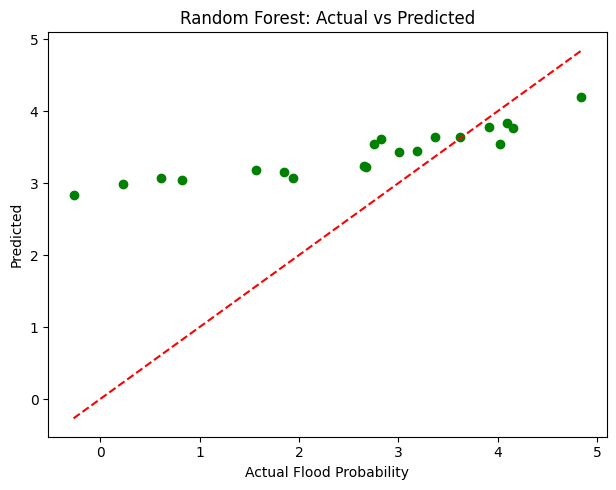

In [11]:

# Make predictions with Random Forest
rf_pred = rf_model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 5))


# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Non-parallel training
model_np = RandomForestRegressor(n_jobs=1, random_state=42)
start_np = time.time()
model_np.fit(X_train_scaled, y_train)
end_np = time.time()
print(f"Training time without parallelism: {end_np - start_np:.2f} seconds")

# Parallel training
model_p = RandomForestRegressor(n_jobs=-1, random_state=42)
start_p = time.time()
model_p.fit(X_train_scaled, y_train)
end_p = time.time()
print(f"Training time with parallelism: {end_p - start_p:.2f} seconds")


Training time without parallelism: 0.13 seconds
Training time with parallelism: 0.16 seconds
